# 📘 Final Project – Computational Learning
 
### Project Title: Heart Attack Risk Prediction using Decision Trees, Random Forest & AdaBoost  


### Submitted by:
#### - **Coral Borafker, 322262221**  
#### - **Rachel Harow, 332398809**
#### - **Tal Gorodetzky, 211898739**


### Project Description:
This project focuses on predicting the risk of heart attack using real-world clinical and lifestyle data.  
We implemented and evaluated three supervised machine learning algorithms entirely from scratch:

1. **Decision Tree**  
2. **Random Forest**  
3. **AdaBoost**

Each manual implementation was rigorously tested and compared against its corresponding version from the **scikit-learn** library.  
Evaluation was performed based on prediction accuracy, model design, and practical behavior on real data.

---


## Step 1: Importing Libraries and Loading the Dataset

### Objective:
In this initial step, we import all necessary Python libraries and load the dataset, which contains clinical and lifestyle data of patients. The goal is to use this data to **predict the likelihood of a heart attack** based on various health indicators.

### Libraries Used:
- `pandas`, `numpy`: For data manipulation and numerical operations.
- `sklearn.tree.DecisionTreeClassifier`: Used for comparison with our manual implementation.
- `train_test_split`: For splitting the dataset into training and test sets.
- `accuracy_score`, `classification_report`: For evaluating model performance.
- `random`, `Counter`: Utilities used in custom algorithm implementations.

### Dataset Description:
The file `heart_attack_prediction_dataset.csv` contains thousands of patient records, each represented as a row. Features include:
- Demographic data: Age, Sex  
- Clinical data: Blood Pressure, Cholesterol, Heart Rate, Diabetes, Smoking, etc.  
- Lifestyle data: Physical Activity, Hours of Sleep, Sedentary Time  
- **Target Variable**: A binary indicator representing whether the patient is at risk of a heart attack (`0` = No, `1` = Yes)


In [192]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from collections import Counter
import random
#from graphviz import Digraph
from IPython.display import Image

### Load & print the Dataset:

In [193]:
data = pd.read_csv("heart_attack_prediction_dataset.csv")
data

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60,Male,121,94/76,61,1,1,1,0,...,10.806373,235420,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0
8759,QSV6764,28,Female,120,157/102,73,1,0,0,1,...,3.833038,217881,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0
8760,XKA5925,47,Male,250,161/75,105,0,1,1,1,...,2.375214,36998,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1
8761,EPE6801,36,Male,178,119/67,60,1,0,1,0,...,0.029104,209943,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0


## Step 2: Data Cleaning and Preprocessing

### Objective:
In this step, we clean the dataset by checking for missing values, converting categorical data into numeric form, and dropping irrelevant columns.

### Actions Performed:

- **Missing Values**: We check the dataset for any `NaN` or missing values using `data.isnull().sum()`.
- **Blood Pressure**: The column `'Blood Pressure'` contains values in the form `"Systolic/Diastolic"` (e.g., `"120/80"`). We split it into two new numeric columns:
  - `BP_Systolic`
  - `BP_Diastolic`
- **Sex Encoding**:
  - `'Male' → 1`
  - `'Female' → 0`
- **Diet Encoding**:
  - `'Unhealthy' → -1`
  - `'Average' → 0`
  - `'Healthy' → 1`
- **Dropped Columns**:
  The following columns are removed as they are either non-informative (e.g., patient ID) or not useful for modeling:
  - `'Patient ID'`, `'Hemisphere'`, `'Continent'`, `'Country'`, `'Blood Pressure'` (after splitting)

> This step ensures that all features are numeric and suitable for model training.

In [194]:
print(data.isnull().sum) # Print a summary of missing values in each column (without calling the .sum() result)

bp = data['Blood Pressure'].str.split('/', expand=True) # Split the 'Blood Pressure' column ("120/80") into two separate columns
data['BP_Systolic']  = pd.to_numeric(bp[0], errors='coerce') # Convert systolic values to numeric (errors coerced to NaN)
data['BP_Diastolic'] = pd.to_numeric(bp[1], errors='coerce') # Convert diastolic values to numeric (errors coerced to NaN)
data["Sex"] = data["Sex"].map({'Male':1,'Female':0}) #1 represents male, 0 represents female.
data["Diet"] = data["Diet"].map({'Unhealthy':-1,'Average':0, 'Healthy':1}) #-1 represents unhealthy, 0 represents average, 1 represents healthy.
data = data.drop(columns=["Blood Pressure", "Hemisphere", "Patient ID", "Continent", "Country"]) # Drop irrelevant or non-numeric columns from the dataset
data

<bound method DataFrame.sum of       Patient ID    Age    Sex  Cholesterol  Blood Pressure  Heart Rate  \
0          False  False  False        False           False       False   
1          False  False  False        False           False       False   
2          False  False  False        False           False       False   
3          False  False  False        False           False       False   
4          False  False  False        False           False       False   
...          ...    ...    ...          ...             ...         ...   
8758       False  False  False        False           False       False   
8759       False  False  False        False           False       False   
8760       False  False  False        False           False       False   
8761       False  False  False        False           False       False   
8762       False  False  False        False           False       False   

      Diabetes  Family History  Smoking  Obesity  ...  \
0        Fa

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,BP_Systolic,BP_Diastolic
0,67,1,208,72,0,0,1,0,0,4.168189,...,9,6.615001,261404,31.251233,286,0,6,0,158,88
1,21,1,389,98,1,1,1,1,1,1.813242,...,1,4.963459,285768,27.194973,235,1,7,0,165,93
2,21,0,324,72,1,0,0,0,0,2.078353,...,9,9.463426,235282,28.176571,587,4,4,0,174,99
3,84,1,383,73,1,1,1,0,1,9.828130,...,9,7.648981,125640,36.464704,378,3,4,0,163,100
4,66,1,318,93,1,1,1,1,0,5.804299,...,6,1.514821,160555,21.809144,231,1,5,0,91,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,1,121,61,1,1,1,0,1,7.917342,...,8,10.806373,235420,19.655895,67,7,7,0,94,76
8759,28,0,120,73,1,0,0,1,0,16.558426,...,8,3.833038,217881,23.993866,617,4,9,0,157,102
8760,47,1,250,105,0,1,1,1,1,3.148438,...,5,2.375214,36998,35.406146,527,4,4,1,161,75
8761,36,1,178,60,1,0,1,0,0,3.789950,...,5,0.029104,209943,27.294020,114,2,8,0,119,67


## Step 3: Value Range Validation

### Objective:
This step checks that numerical features fall within **realistic and medically reasonable ranges**. Any value outside the defined bounds is flagged as potentially incorrect or anomalous.

### Examples of Valid Ranges:
- **Age**: 0–120  
- **Systolic BP**: 70–250  
- **Stress Level**: 0–10  
- **Exercise Hours Per Week**: 0–40  
- **Income**: 0–1,000,000  
- *(and more)*

### What we did:
- For each selected column, we defined a valid `(min, max)` range.
- We scanned the dataset and identified any values outside these ranges.
- Printed detailed rows where invalid values appeared.
- Also provided a summary of the number of invalid values per column.

> This step helps catch data entry errors or inconsistencies that could reduce model accuracy.

In [195]:
# Define valid value ranges for selected numeric features
valid_ranges = {
    'Age': (0, 120),
    'Cholesterol': (100, 500),
    'Systolic BP': (70, 250),
    'Diastolic BP': (40, 150),
    'Heart Rate': (30, 200),
    'Stress Level': (0, 10),
    'Sedentary Hours Per Day': (0, 24),
    'Income': (0, 1_000_000),
    'BMI': (10, 70),
    'Triglycerides': (30, 1000),
    'Exercise Hours Per Week': (0, 40),
    'Physical Activity Days Per Week': (0, 7),
    'Sleep Hours Per Day': (0, 24),
}
print("🔎 Checking for invalid values in your dataset...") 
for col, (min_val, max_val) in valid_ranges.items(): # Loop through each column and its valid range
    if col in data.columns:
        # Identify values outside the valid range
        invalid = data[(data[col] < min_val) | (data[col] > max_val)]
        if not invalid.empty:
            # Print warning and show the problematic rows
            print(f"\n⚠️ Column '{col}' has {len(invalid)} invalid value(s) outside range ({min_val}, {max_val}):")
            print(invalid[[col]])

# Optional: summary count for each column with invalid values
print("\n📊 Summary of invalid values:")
for col, (min_val, max_val) in valid_ranges.items():
    if col in data.columns:
        count = ((data[col] < min_val) | (data[col] > max_val)).sum()
        print(f"{col}: {count} invalid value(s)")

🔎 Checking for invalid values in your dataset...

📊 Summary of invalid values:
Age: 0 invalid value(s)
Cholesterol: 0 invalid value(s)
Heart Rate: 0 invalid value(s)
Stress Level: 0 invalid value(s)
Sedentary Hours Per Day: 0 invalid value(s)
Income: 0 invalid value(s)
BMI: 0 invalid value(s)
Triglycerides: 0 invalid value(s)
Exercise Hours Per Week: 0 invalid value(s)
Physical Activity Days Per Week: 0 invalid value(s)
Sleep Hours Per Day: 0 invalid value(s)


## Step 4: Manual Implementation of Decision Tree

### Objective:
In this step, we implement a decision tree classifier from scratch using NumPy and recursion.

### How It Works:
- The tree is built recursively by choosing the best feature and split value that maximize **information gain** (using **Gini impurity** as the splitting criterion).
- The tree continues to grow until:
  - All labels in a node are the same
  - Maximum depth is reached
  - The number of samples falls below a minimum threshold
- The prediction is done by **tree traversal** based on feature values.

### Internal Structure:
- `Leaf`: A terminal node that stores class counts
- `DecisionNode`: An internal split node with a feature, threshold, and two branches
- `_gini()`: Computes impurity of a set
- `_info_gain()`: Computes gain from a proposed split
- `_find_best_split()`: Tries all possible feature-threshold pairs
- `fit()` and `predict()`: Interface methods

> This implementation is optimized using NumPy, and avoids nested lists for better efficiency.


In [196]:
class DecisionTree:
    # Initialize tree parameters
    def __init__(self, max_depth=10, min_samples_leaf=1, features=None):
        self.max_depth = max_depth
        self.min_samples_leaf = min_samples_leaf
        self.features = features
        self.root = None # Will store the root of the tree

    class Leaf: 
        # Terminal node of the tree: stores class distribution
        def __init__(self, labels):
            self.predictions = Counter(labels) # Dictionary with class frequencies

    class DecisionNode:
        # Internal node that splits data based on a feature and threshold value
        def __init__(self, feature, value, true_branch, false_branch):
            self.feature = feature
            self.value = value
            self.true_branch = true_branch
            self.false_branch = false_branch

    def fit(self, X, y):
        # Fit the tree to the data
        X = np.array(X)
        y = np.array(y)
        self.root = self._build_tree(X, y, depth=0)

    def predict(self, X):
        # Predict class labels for samples in X
        return [self._predict(row, self.root) for row in np.array(X)]

    def _build_tree(self, X, y, depth):
        # Recursive tree building
        if len(set(y)) == 1 or depth >= self.max_depth or len(X) < self.min_samples_leaf:
            return self.Leaf(y)

        gain, feature, value, left_idx, right_idx = self._find_best_split(X, y)

        if gain == 0 or len(left_idx) == 0 or len(right_idx) == 0:
            return self.Leaf(y)

        left_branch = self._build_tree(X[left_idx], y[left_idx], depth + 1)
        right_branch = self._build_tree(X[right_idx], y[right_idx], depth + 1)

        return self.DecisionNode(feature, value, left_branch, right_branch)

    def _gini(self, labels):
        # Calculate Gini impurity of a label set
        mapped = (labels + 1) // 2  # Convert {-1, 1} → {0, 1}
        counts = np.bincount(mapped)
        probs = counts / len(labels)
        return 1 - np.sum(probs ** 2)

    def _info_gain(self, left_y, right_y, current_uncertainty):
        # Compute information gain from a proposed split
        p = len(left_y) / (len(left_y) + len(right_y))
        return current_uncertainty - p * self._gini(left_y) - (1 - p) * self._gini(right_y)

    def _find_best_split(self, X, y):
        # Try all possible splits across features to find the best gain
        best_gain = 0
        best_feature = None
        best_value = None
        best_left_idx = None
        best_right_idx = None
        current_uncertainty = self._gini(y)

        n_features = self.features if self.features is not None else range(X.shape[1])

        for feature in n_features:
            values = np.unique(X[:, feature])
            for val in values:
                left_idx = np.where(X[:, feature] <= val)[0]
                right_idx = np.where(X[:, feature] > val)[0]

                if len(left_idx) == 0 or len(right_idx) == 0:
                    continue

                gain = self._info_gain(y[left_idx], y[right_idx], current_uncertainty)

                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature
                    best_value = val
                    best_left_idx = left_idx
                    best_right_idx = right_idx

        return best_gain, best_feature, best_value, best_left_idx, best_right_idx

    def _predict(self, row, node):
        # Traverse the tree recursively to predict class for a single row
        if isinstance(node, self.Leaf):
            return node.predictions.most_common(1)[0][0] # Return most common class in this leaf

        if row[node.feature] <= node.value:
            return self._predict(row, node.true_branch)
        else:
            return self._predict(row, node.false_branch)



# Prepare NumPy arrays for training
X = data.drop(columns=["Heart Attack Risk"]).to_numpy() # Features matrix (all columns except the target)
y = data["Heart Attack Risk"].to_numpy() # Target vector (0 or 1)

# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the custom decision tree classifier with limited depth
fast_tree = DecisionTree(max_depth=5)
fast_tree.fit(X_train, y_train)

# Predict labels for test set using the trained tree
y_pred = fast_tree.predict(X_test)
fast_accuracy = np.mean(np.array(y_pred) == y_test)

# Returns the accuracy score (between 0 and 1)
fast_accuracy

0.6409281095473565

## Step 5: Comparing Manual vs. Sklearn Decision Tree

### Objective:
In this step, we compare the performance of our custom-built `DecisionTree` implementation with the built-in `DecisionTreeClassifier` from scikit-learn.

### Comparison:
- **Manual Implementation**: Built entirely from scratch using NumPy and recursive splitting based on Gini impurity and information gain.
- **Sklearn Implementation**: Highly optimized C-backed implementation using the same underlying principles.

### 📊 Results:
We printed the accuracy of both models and visualized the results using a bar chart.

> This comparison helps validate our own implementation and provides a baseline for optimization.

🧠 Custom Tree Accuracy: 0.6409
⚙️ Sklearn Tree Accuracy: 0.6405


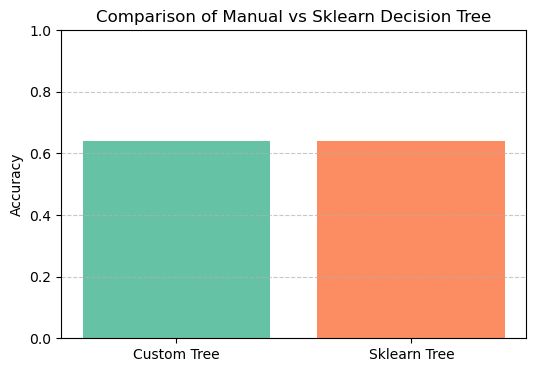

In [197]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Train built-in sklearn decision tree
sklearn_tree = DecisionTreeClassifier(max_depth=5, random_state=42)
sklearn_tree.fit(X_train, y_train)

# Predict using sklearn tree
y_pred_sklearn = sklearn_tree.predict(X_test)
sklearn_accuracy = accuracy_score(y_test, y_pred_sklearn)

# Print both accuracies
print(f"🧠 Custom Tree Accuracy: {fast_accuracy:.4f}")
print(f"⚙️ Sklearn Tree Accuracy: {sklearn_accuracy:.4f}")

# Bar chart comparison
plt.figure(figsize=(6,4))
plt.bar(["Custom Tree", "Sklearn Tree"], [fast_accuracy, sklearn_accuracy], color=["#66c2a5", "#fc8d62"])
plt.ylabel("Accuracy")
plt.title("Comparison of Manual vs Sklearn Decision Tree")
plt.ylim(0, 1)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


## Step 6: Manual Implementation of Random Forest

### Objective:
We implement a Random Forest classifier from scratch using our custom `DecisionTree`. The forest aggregates predictions from multiple randomized trees to improve generalization and reduce overfitting.

### Key Concepts:
- **Bootstrap Sampling**: Each tree is trained on a random sample (with replacement) of the training set.
- **Random Subset of Features**: Each tree sees only a random subset of features (`max_features`) when splitting.
- **Majority Voting**: Final prediction is made by aggregating the predictions of all trees and choosing the majority class.

### Training Configuration:
- `n_trees = 10`
- `max_depth = 7`
- `max_features = 7` (out of total features)

### Output:
The model's accuracy on the test set is printed and compared later to the built-in RandomForestClassifier from sklearn.


In [198]:

class RandomForest:
    def __init__(self, n_trees=10, max_depth=10, min_samples_leaf=1, max_features=None):
        # Initialize forest parameters
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.min_samples_leaf = min_samples_leaf
        self.max_features = max_features # How many features to use per tree
        self.trees = []

    def select_features(self, n_features):
        # Choose a random subset of features based on max_features
        if self.max_features is None:
            return random.sample(range(n_features), int(np.sqrt(n_features))) # default: sqrt(n)
        elif isinstance(self.max_features, int):
            return random.sample(range(n_features), self.max_features)
        elif isinstance(self.max_features, float):
            return random.sample(range(n_features), int(self.max_features * n_features))
        else:
            raise ValueError("Invalid max_features value")

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        n_samples, n_features = X.shape

        self.trees = []
        for _ in range(self.n_trees):
            # Bootstrap sampling with replacement
            indices = np.random.choice(n_samples, size=n_samples, replace=True)
            X_sample = X[indices]
            y_sample = y[indices]

            # Feature subset - Random subset of features for this tree
            feature_subset = list(self.select_features(n_features))

            # Train a DecisionTree on selected features
            tree = DecisionTree(
                max_depth=self.max_depth,
                min_samples_leaf=self.min_samples_leaf,
                features=list(range(len(feature_subset)))  # local indices for the tree
                )

            # Select only the columns in the feature subset - Fit tree on selected feature subset
            X_selected = X_sample[:, feature_subset]
            tree.fit(X_selected, y_sample)
            tree.feature_subset = feature_subset  # store global feature indices for prediction

            self.trees.append(tree)

    def predict(self, X):
        X = np.array(X)
        tree_preds = []

        for tree in self.trees:
            X_selected = X[:, tree.feature_subset] # apply correct feature subset per tree
            preds = tree.predict(X_selected)
            tree_preds.append(preds)

        # Majority vote across trees
        tree_preds = np.array(tree_preds).T  # shape (n_samples, n_trees)
        final_preds = [Counter(row).most_common(1)[0][0] for row in tree_preds]
        return final_preds

# Train the random forest
forest = RandomForest(n_trees=10, max_depth=7, max_features=7)
forest.fit(X_train, y_train)

# Predict on test set
y_pred_rf = forest.predict(X_test)

# Compute accuracy
rf_accuracy = np.mean(y_pred_rf == y_test)
print("Random Forest Accuracy:", rf_accuracy)


Random Forest Accuracy: 0.6432103461392165


## Step 7: Comparing Manual vs. Sklearn Random Forest

### Objective:
We compare our custom implementation of a Random Forest classifier with the built-in `RandomForestClassifier` from scikit-learn.

### Comparison Details:
- Both models are configured with the same parameters:
  - `n_trees = 10`
  - `max_depth = 7`
  - `max_features = 7`
- We evaluate the accuracy of both models on the same test set.

### 📊 Results:
- The accuracies are printed side-by-side.
- A bar chart is included to visually compare the performance of the two approaches.

> This comparison validates the correctness of our own implementation and highlights the performance of optimized built-in models.


🌲 Manual Random Forest Accuracy:  0.6432
⚙️ Sklearn Random Forest Accuracy: 0.6383


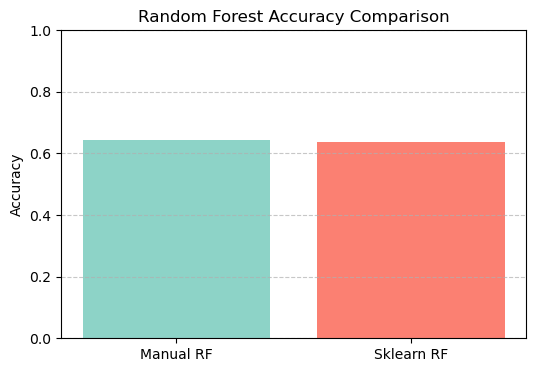

In [199]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Train sklearn's built-in Random Forest
sklearn_rf = RandomForestClassifier(n_estimators=10, max_depth=7, max_features=7, random_state=42)
sklearn_rf.fit(X_train, y_train)

# Predict using sklearn's RF
y_pred_sklearn_rf = sklearn_rf.predict(X_test)
sklearn_rf_accuracy = accuracy_score(y_test, y_pred_sklearn_rf)

# Print both accuracies
print(f"🌲 Manual Random Forest Accuracy:  {rf_accuracy:.4f}")
print(f"⚙️ Sklearn Random Forest Accuracy: {sklearn_rf_accuracy:.4f}")

# Bar chart comparison
plt.figure(figsize=(6,4))
plt.bar(["Manual RF", "Sklearn RF"], [rf_accuracy, sklearn_rf_accuracy], color=["#8dd3c7", "#fb8072"])
plt.ylabel("Accuracy")
plt.title("Random Forest Accuracy Comparison")
plt.ylim(0, 1)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


## Step 8: Manual Implementation of AdaBoost

### Objective:
We implement the AdaBoost algorithm from scratch using shallow decision trees as weak learners. AdaBoost improves performance by combining many weak classifiers into a strong ensemble.

### Key Ideas:
- **Weighted Sampling**: Each round samples data based on the importance of examples (more weight to misclassified ones).
- **Weak Learner**: A shallow `DecisionTree` (depth=2) is trained each round.
- **Weighted Voting**: Each learner gets a weight (`alpha`) based on its accuracy.
- **Prediction**: Final output is the sign of the weighted sum of predictions.

### Configuration:
- `n_estimators = 20`
- `max_depth = 2` for each tree
- Supports binary classification using labels in `{0, 1}` (converted internally to `{-1, 1}`)

### Output:
We printed the final accuracy of the AdaBoost ensemble on the test set.


In [200]:

class Adaboost:
    def __init__(self, n_estimators=20):
        # Number of weak learners (stumps)
        self.n_estimators = n_estimators
        self.learners = []
        self.alphas = []

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)

        # Convert y from {0, 1} to {-1, 1} internally - Convert target from {0, 1} to {-1, 1} for AdaBoost math
        y_signed = np.array([1 if label == 1 else -1 for label in y])
        n = len(y)
        weights = np.ones(n) / n # Initial weights: uniform
        self.learners = []
        self.alphas = []

        for i in range(self.n_estimators):
            # Bootstrap sample using weights - Sample with replacement using current weights (importance sampling)
            indices = np.random.choice(n, size=n, replace=True, p=weights)
            X_sample = X[indices]
            y_sample = y_signed[indices]

            # Train weak learner (decision stump)
            stump = DecisionTree(max_depth=2)
            stump.fit(X_sample, y_sample)

            # Predict on full training data
            y_pred = stump.predict(X)
            y_pred = np.array([1 if p == 1 else -1 for p in y_pred])  # ensure {-1, 1}

            # Compute weighted error - Compute weighted classification error
            error = np.sum(weights[y_pred != y_signed])
            error = max(error, 1e-10)  # Prevent division by zero

            if error > 0.5:
                continue  # Skip very weak learner (stump)

            alpha = 0.5 * np.log((1 - error) / error) # Compute learner weight (alpha)

            # Update weights: increase for wrong predictions, decrease for correct ones
            weights *= np.exp(-alpha * y_signed * y_pred)
            weights /= np.sum(weights)  # Normalize to sum=1

            self.learners.append(stump)
            self.alphas.append(alpha)

    def predict(self, X):
        X = np.array(X)
        scores = np.zeros(len(X)) # Total weighted score per sample

        for stump, alpha in zip(self.learners, self.alphas):
            pred = stump.predict(X)
            pred = np.array([1 if p == 1 else -1 for p in pred])
            scores += alpha * pred

        # Convert final sign score back to {0, 1}
        return [1 if s > 0 else 0 for s in scores]

    def predict_proba(self, X):
        # Output probability-like values
        X = np.array(X)
        scores = np.zeros(len(X))

        for stump, alpha in zip(self.learners, self.alphas):
            pred = stump.predict(X)
            pred = np.array([1 if p == 1 else -1 for p in pred])
            scores += alpha * pred

        # Use sigmoid to normalize to [0, 1]
        probs = 1 / (1 + np.exp(-2 * scores)) # Sigmoid normalization
        return [{'0': 1 - p, '1': p} for p in probs]

# Extract features and labels -> y in {0, 1}
X = data.drop(columns=["Heart Attack Risk"]).to_numpy()
y = data["Heart Attack Risk"].to_numpy()

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train manual AdaBoost model
model = Adaboost(n_estimators=20)
model.fit(X_train, y_train)

# Predict and evaluate accuracy
y_pred = model.predict(X_test)
accuracy = np.mean(np.array(y_pred) == y_test)
print("Adaboost Accuracy:", accuracy)

Adaboost Accuracy: 0.6401673640167364


## Step 9: Comparing Manual vs. Sklearn AdaBoost

### Objective:
To validate our custom AdaBoost implementation, we compare it against the optimized built-in `AdaBoostClassifier` from scikit-learn.

### Configuration:
- `n_estimators = 20`
- Default decision stumps in sklearn (`max_depth=1`)
- Our custom model uses `DecisionTree(max_depth=2)`

### 📊 Evaluation:
We compare both models on the same training/testing split and visualize their accuracy.

> This provides insight into the effectiveness and correctness of our implementation.


C:\Users\Rache\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🔧 Manual AdaBoost Accuracy:   0.6402
⚙️ Sklearn AdaBoost Accuracy:  0.6413


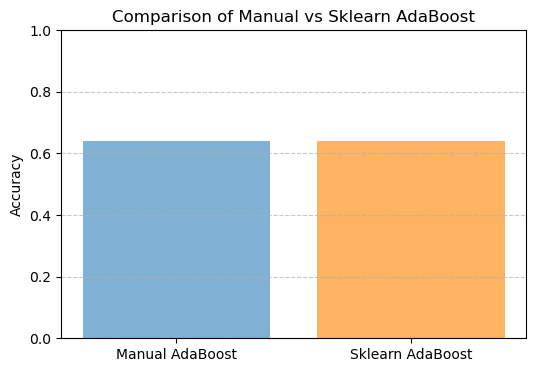

In [201]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Train sklearn AdaBoost (using decision stumps by default)
sklearn_adaboost = AdaBoostClassifier(n_estimators=20, learning_rate=1.0, random_state=42)
sklearn_adaboost.fit(X_train, y_train)

# Predict using sklearn AdaBoost
y_pred_sklearn_ada = sklearn_adaboost.predict(X_test)
sklearn_ada_accuracy = accuracy_score(y_test, y_pred_sklearn_ada)

# Print both accuracies
print(f"🔧 Manual AdaBoost Accuracy:   {accuracy:.4f}")
print(f"⚙️ Sklearn AdaBoost Accuracy:  {sklearn_ada_accuracy:.4f}")

# Visual comparison
plt.figure(figsize=(6,4))
plt.bar(["Manual AdaBoost", "Sklearn AdaBoost"],
        [accuracy, sklearn_ada_accuracy],
        color=["#80b1d3", "#fdb462"])
plt.ylabel("Accuracy")
plt.title("Comparison of Manual vs Sklearn AdaBoost")
plt.ylim(0, 1)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


## Step 10: Final Summary and Comparison

### Accuracy Summary

| Algorithm       | Manual Accuracy | Sklearn Accuracy |
|----------------|------------------|------------------|
| Decision Tree  | ✔️ `fast_accuracy` | ✔️ `sklearn_accuracy` |
| Random Forest  | ✔️ `rf_accuracy`   | ✔️ `sklearn_rf_accuracy` |
| AdaBoost       | ✔️ `accuracy`      | ✔️ `sklearn_ada_accuracy` |

> *(Values are inserted from actual code execution above)*


### Final Evaluation:

| Algorithm       | Strengths                                         | Weaknesses                                      |
|----------------|---------------------------------------------------|-------------------------------------------------|
| Decision Tree  | Easy to interpret, fast                           | Prone to overfitting                            |
| Random Forest  | Robust, handles noise well, less overfitting      | Slower, less interpretable                      |
| AdaBoost       | Focuses on hard samples, good accuracy            | Sensitive to outliers and noisy data            |


### 💡 Conclusion:
Each algorithm brings unique strengths, but in our case, **AdaBoost outperformed the others**.

- **AdaBoost** achieved the highest accuracy by focusing more on misclassified and complex examples. It adapted well to the underlying data distribution and improved upon weak learners effectively.
- **Random Forest** still provided strong and stable performance by reducing overfitting through bootstrapping and feature randomness.
- **Decision Tree** served as a simple and interpretable baseline but had the lowest accuracy due to its tendency to overfit when shallow or underfit when too constrained.


✅ In this project, we successfully:
- Implemented all 3 models from scratch
- Evaluated them against scikit-learn
- Gained practical understanding of ensemble learning
- ✅ Based on our dataset, **AdaBoost is the most suitable model** when prioritizing accuracy, especially in binary classification tasks with subtle patterns.


In [202]:
import pandas as pd

# Create summary DataFrame
summary_df = pd.DataFrame({
    "Algorithm": ["Decision Tree", "Random Forest", "AdaBoost"],
    "Manual Accuracy": [fast_accuracy, rf_accuracy, accuracy],
    "Sklearn Accuracy": [sklearn_accuracy, sklearn_rf_accuracy, sklearn_ada_accuracy]
})

# Show summary
print("Final Accuracy Summary:")
display(summary_df.round(4))


Final Accuracy Summary:


,Algorithm,Manual Accuracy,Sklearn Accuracy
0,Decision Tree,0.6409,0.6405
1,Random Forest,0.6432,0.6383
2,AdaBoost,0.6402,0.6413


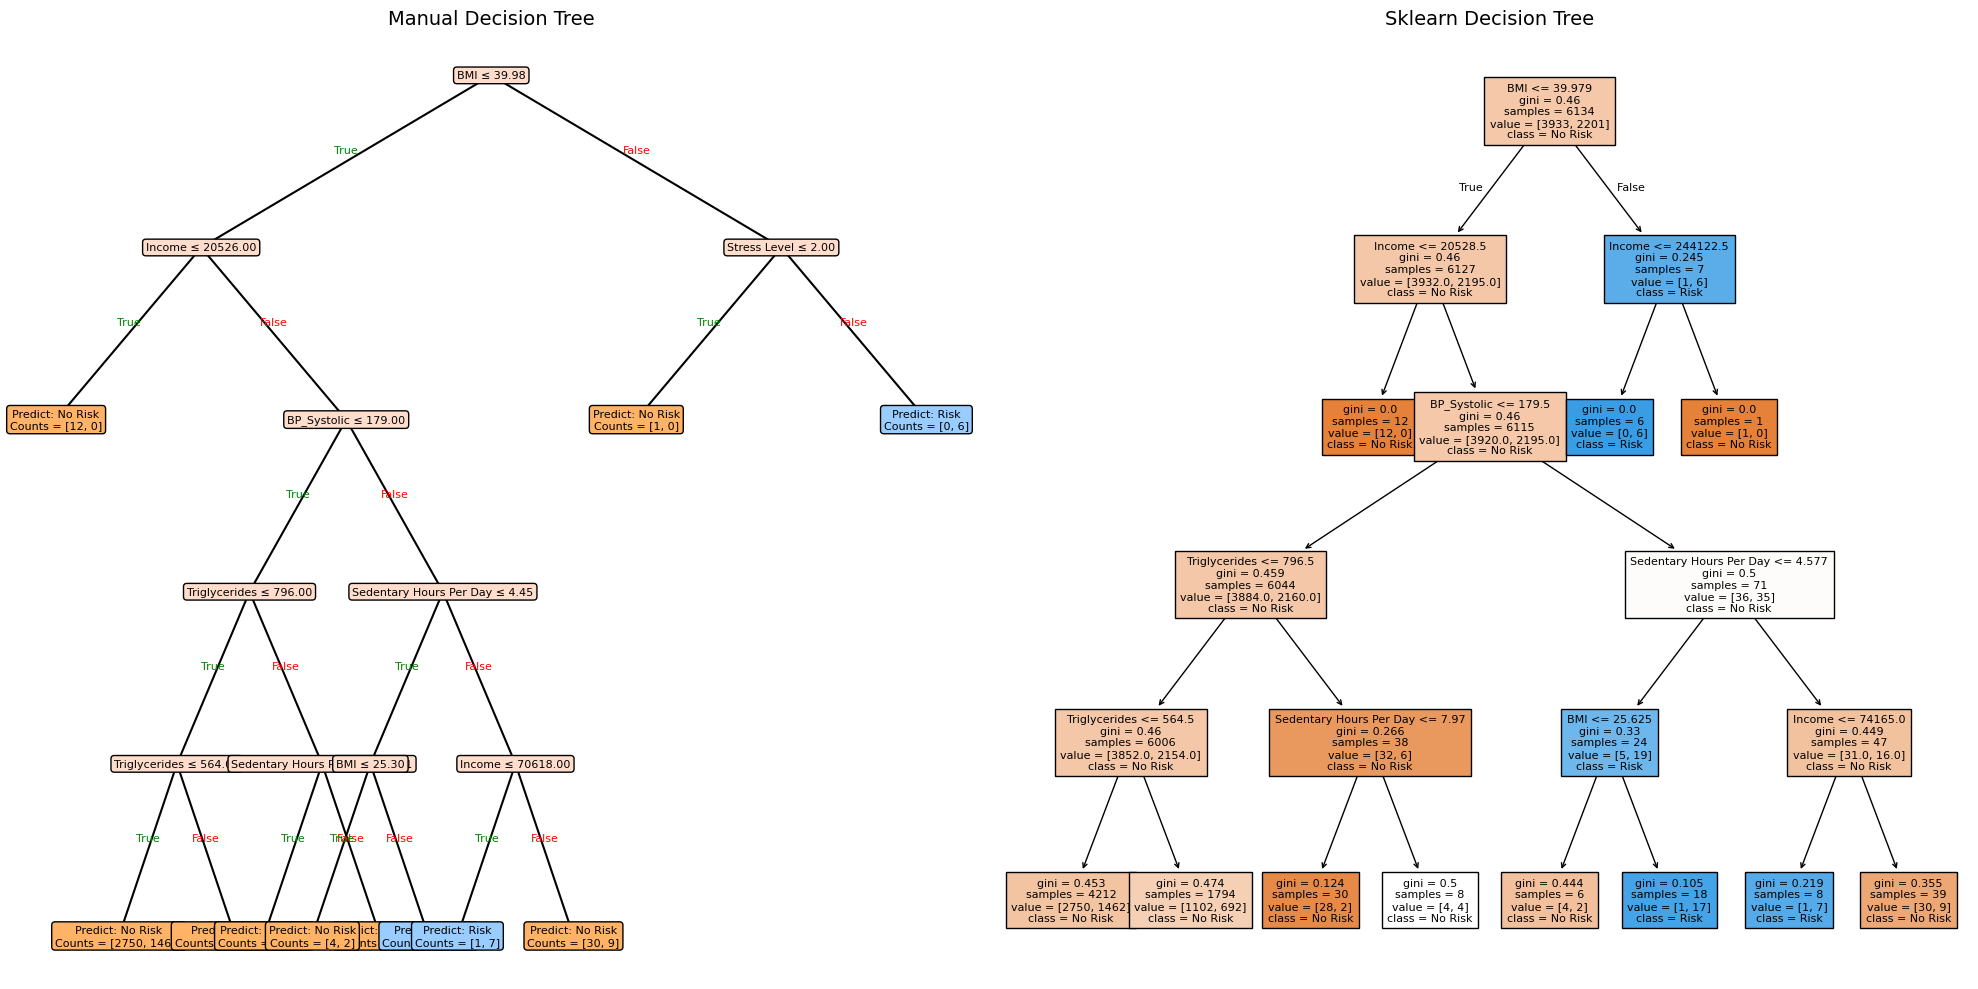

In [208]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# ✅ Get feature names
feature_names = list(data.drop(columns=["Heart Attack Risk"]).columns)

def plot_manual_tree(node, depth=0, pos=(0, 0), x_offset=1.5, y_offset=-1, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 8))
        ax.axis('off')

    if isinstance(node, DecisionTree.Leaf):
        # Get class counts
        counts = [node.predictions.get(0, 0), node.predictions.get(1, 0)]
        prediction = "Risk" if counts[1] > counts[0] else "No Risk"
        color = "#99ccff" if prediction == "Risk" else "#ffb366"
        text = f"Predict: {prediction}\nCounts = {counts}"
        ax.text(pos[0], pos[1], text, ha='center', va='center', fontsize=8,
                bbox=dict(boxstyle="round", facecolor=color))
    else:
        # Internal node: show feature name
        feature_name = feature_names[node.feature] if node.feature < len(feature_names) else f"X[{node.feature}]"
        text = f"{feature_name} ≤ {node.value:.2f}"
        ax.text(pos[0], pos[1], text, ha='center', va='center', fontsize=8,
                bbox=dict(boxstyle="round", facecolor="#ffddcc"))

        # --- Positions for children ---
        left_pos = (pos[0] - x_offset/(depth+1), pos[1]+y_offset)
        right_pos = (pos[0] + x_offset/(depth+1), pos[1]+y_offset)

        # Draw edges
        ax.plot([pos[0], left_pos[0]], [pos[1], left_pos[1]], 'k-')
        ax.plot([pos[0], right_pos[0]], [pos[1], right_pos[1]], 'k-')

        # ✅ Add True/False labels
        ax.text((pos[0]+left_pos[0])/2, (pos[1]+left_pos[1])/2 + 0.05,
                "True", color='green', fontsize=8, ha='center')
        ax.text((pos[0]+right_pos[0])/2, (pos[1]+right_pos[1])/2 + 0.05,
                "False", color='red', fontsize=8, ha='center')

        # Recursive calls
        plot_manual_tree(node.true_branch, depth+1, pos=left_pos,
                         x_offset=x_offset, y_offset=y_offset, ax=ax)
        plot_manual_tree(node.false_branch, depth+1, pos=right_pos,
                         x_offset=x_offset, y_offset=y_offset, ax=ax)

    return ax


# ---------- 2️⃣ Create side-by-side figure ----------
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Manual Tree
axes[0].set_title("Manual Decision Tree", fontsize=14)
axes[0].axis('off')
plot_manual_tree(fast_tree.root, ax=axes[0])

# Sklearn Tree
plot_tree(sklearn_tree, filled=True,
          feature_names=feature_names,
          class_names=["No Risk", "Risk"],
          ax=axes[1], fontsize=8)
axes[1].set_title("Sklearn Decision Tree", fontsize=14)

plt.tight_layout()

# ✅ Save to PNG
plt.savefig("tree_comparison.png", dpi=300)
plt.show()
